# Before you begin


1.   Use the [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) to Create a Cloud Platform project if you do not already have one.
2.   [Enable billing](https://support.google.com/cloud/answer/6293499#enable-billing) for the project.
3.   [Enable BigQuery](https://console.cloud.google.com/flows/enableapi?apiid=bigquery) APIs for the project.


### Provide your Google Cloud credentials to the runtime

In [27]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


## Optional: Enable data table display

Colab includes the ``google.colab.data_table`` package that can be used to display large pandas dataframes as an interactive data table.
It can be enabled with:

In [28]:
%load_ext google.colab.data_table

If you would prefer to return to the classic Pandas dataframe display, you can disable this by running:
```python
%unload_ext google.colab.data_table
```

Declare the Cloud project ID which will be used throughout this notebook

In [29]:
project_id = 'cmpe181hw1option1'

In [30]:
!gcloud config list

[component_manager]
disable_update_check = True
[compute]
gce_metadata_read_timeout_sec = 0
[core]
account = danielle.shen@sjsu.edu

Your active configuration is: [default]


In [31]:
#!gcloud config set compute/region us-central1
#!gcloud config set compute/zone us-central1-a
!gcloud config list project

[core]
project (unset)

Your active configuration is: [default]


In [32]:
!gcloud config set project 'cmpe181hw1option1'

Updated property [core/project].


In [33]:
!gcloud config list project

[core]
project = cmpe181hw1option1

Your active configuration is: [default]


# BigQuery Data

In [63]:
from google.cloud import bigquery

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'cmpe181hw1option1'
client = bigquery.Client(project=project_id)

#Print your current data
for dataset in client.list_datasets():
  print(dataset.dataset_id)

copytest
covid_demo


In [77]:
sql = """
SELECT
    *
FROM
    `cmpe181hw1option1.covidItaly.data_by_province`
  ORDER BY region_name
"""
dfquery = client.query(sql)

covidItalyt holds data copied from the COVID19_italy from Google Public Query 


In [78]:
df_sample=dfquery.to_dataframe()
df_sample.head(200)

,date,country,region_code,region_name,province_code,province_name,province_abbreviation,latitude,longitude,location_geom,confirmed_cases,note
0,2020-02-24 18:00:00+00:00,ITA,13,Abruzzo,066,L'Aquila,AQ,42.351222,13.398438,POINT(13.39843823 42.35122196),0,None
1,2020-02-25 18:00:00+00:00,ITA,13,Abruzzo,066,L'Aquila,AQ,42.351222,13.398438,POINT(13.39843823 42.35122196),0,None
2,2020-02-26 18:00:00+00:00,ITA,13,Abruzzo,066,L'Aquila,AQ,42.351222,13.398438,POINT(13.39843823 42.35122196),0,None
3,2020-02-27 18:00:00+00:00,ITA,13,Abruzzo,066,L'Aquila,AQ,42.351222,13.398438,POINT(13.39843823 42.35122196),0,None
4,2020-02-28 18:00:00+00:00,ITA,13,Abruzzo,066,L'Aquila,AQ,42.351222,13.398438,POINT(13.39843823 42.35122196),0,None
...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-09-06 17:00:00+00:00,ITA,13,Abruzzo,066,L'Aquila,AQ,42.351222,13.398438,POINT(13.39843823 42.35122196),507,None
196,2020-09-07 17:00:00+00:00,ITA,13,Abruzzo,066,L'Aquila,AQ,42.351222,13.398438,POINT(13.39843823 42.35122196),519,None
197,2020-09-08 17:00:00+00:00,ITA,13,Abruzzo,066,L'Aquila,AQ,42.351222,13.398438,POINT(13.39843823 42.35122196),520,None
198,2020-09-09 17:00:00+00:00,ITA,13,Abruzzo,066,L'Aquila,AQ,42.351222,13.398438,POINT(13.39843823 42.35122196),524,None


In [79]:
df_sample.tail(200)

,date,country,region_code,region_name,province_code,province_name,province_abbreviation,latitude,longitude,location_geom,confirmed_cases,note
57136,2020-09-13 17:00:00+00:00,ITA,05,Veneto,999,In fase di definizione/aggiornamento,None,NaN,NaN,None,63,None
57137,2020-09-14 17:00:00+00:00,ITA,05,Veneto,999,In fase di definizione/aggiornamento,None,NaN,NaN,None,65,None
57138,2020-09-15 17:00:00+00:00,ITA,05,Veneto,999,In fase di definizione/aggiornamento,None,NaN,NaN,None,67,None
57139,2020-09-16 17:00:00+00:00,ITA,05,Veneto,999,In fase di definizione/aggiornamento,None,NaN,NaN,None,74,None
57140,2020-09-17 17:00:00+00:00,ITA,05,Veneto,999,In fase di definizione/aggiornamento,None,NaN,NaN,None,70,None
...,...,...,...,...,...,...,...,...,...,...,...,...
57331,2021-03-27 17:00:00+00:00,ITA,05,Veneto,999,In fase di definizione/aggiornamento,None,NaN,NaN,None,673,None
57332,2021-03-28 17:00:00+00:00,ITA,05,Veneto,999,In fase di definizione/aggiornamento,None,NaN,NaN,None,677,None
57333,2021-03-29 17:00:00+00:00,ITA,05,Veneto,999,In fase di definizione/aggiornamento,None,NaN,NaN,None,679,None
57334,2021-03-30 17:00:00+00:00,ITA,05,Veneto,999,In fase di definizione/aggiornamento,None,NaN,NaN,None,681,None


In [84]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57336 entries, 0 to 57335
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   date                   57336 non-null  datetime64[ns, UTC]
 1   country                57336 non-null  object             
 2   region_code            57336 non-null  object             
 3   region_name            57336 non-null  object             
 4   province_code          57336 non-null  object             
 5   province_name          57336 non-null  object             
 6   province_abbreviation  43014 non-null  object             
 7   latitude               43014 non-null  float64            
 8   longitude              43014 non-null  float64            
 9   location_geom          43014 non-null  object             
 10  confirmed_cases        57336 non-null  int64              
 11  note                   94 non-null     object         

In [93]:
sql = """
SELECT
    *
FROM
    `cmpe181hw1option1.covidItaly.national_trends`
  ORDER BY date
"""
dfquery = client.query(sql)

In [133]:
df_national = dfquery.to_dataframe()
df_national.head(200)

,date,country,hospitalized_patients_symptoms,hospitalized_patients_intensive_care,total_hospitalized_patients,home_confinement_cases,total_current_confirmed_cases,new_current_confirmed_cases,new_total_confirmed_cases,recovered,deaths,total_confirmed_cases,tests_performed,note
0,2020-02-24 18:00:00+00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,None
1,2020-02-25 18:00:00+00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,None
2,2020-02-26 18:00:00+00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,None
3,2020-02-27 18:00:00+00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,None
4,2020-02-28 18:00:00+00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-09-06 17:00:00+00:00,ITA,1683,133,1816,30262,32078,884,1297,210015,35541,277634,9219257,None
196,2020-09-07 17:00:00+00:00,ITA,1719,142,1861,31132,32993,915,1108,210238,35553,278784,9271810,None
197,2020-09-08 17:00:00+00:00,ITA,1760,143,1903,31886,33789,796,1370,210801,35563,280153,9364213,None
198,2020-09-09 17:00:00+00:00,ITA,1778,150,1928,32806,34734,945,1434,211272,35577,281583,9460203,None


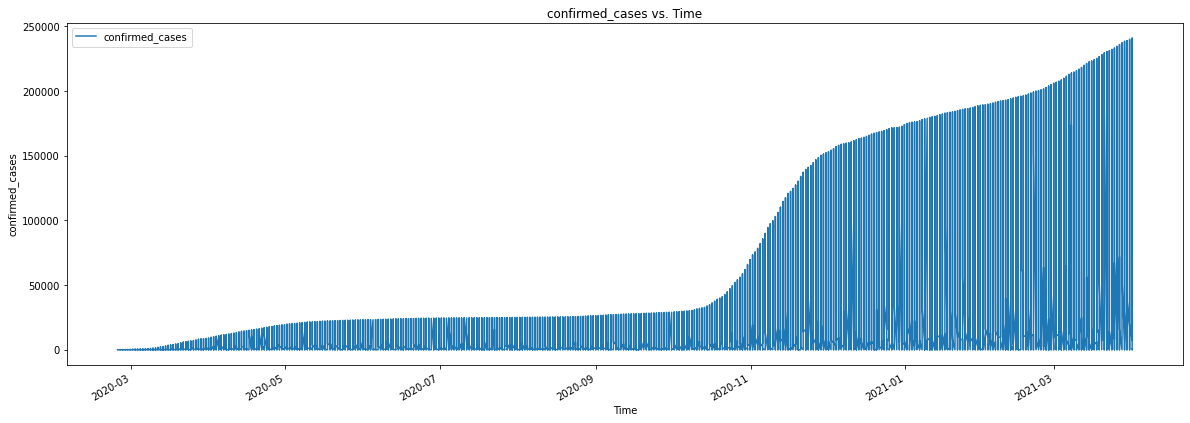

In [85]:
ax = df_sample.plot(kind='line', x='date', y='confirmed_cases', figsize=(20,7))
ax.set_title('confirmed_cases vs. Time')
ax.set_xlabel('Time')
ax.set_ylabel('confirmed_cases');

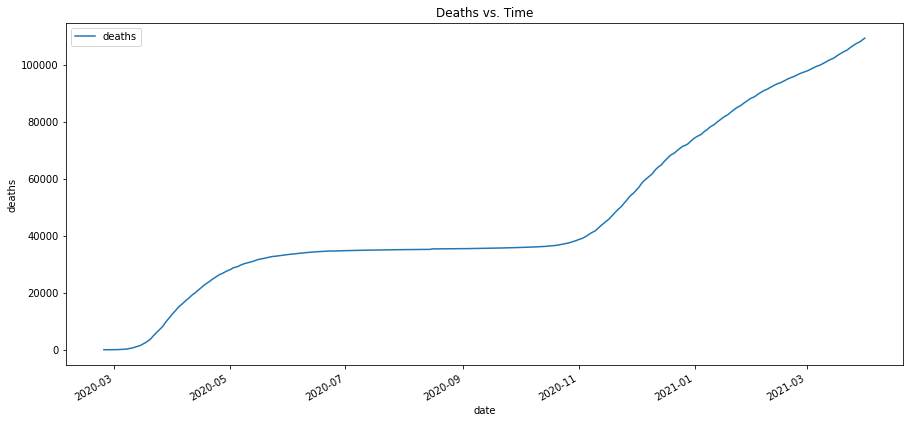

In [96]:
ax = df_national.plot(kind='line', x='date', y='deaths', figsize=(15,7))
ax.set_title('Deaths vs. Time')
ax.set_xlabel('date')
ax.set_ylabel('deaths');
ax.figure.savefig("nytcovid_Deaths.pdf")

# Linear Rgression with one variable 
Followed the code provided in MLIntro1 by the professor

In [146]:
df_national = dfquery.to_dataframe()
df_national.head(200)

,date,country,hospitalized_patients_symptoms,hospitalized_patients_intensive_care,total_hospitalized_patients,home_confinement_cases,total_current_confirmed_cases,new_current_confirmed_cases,new_total_confirmed_cases,recovered,deaths,total_confirmed_cases,tests_performed,note
0,2020-02-24 18:00:00+00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,None
1,2020-02-25 18:00:00+00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,None
2,2020-02-26 18:00:00+00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,None
3,2020-02-27 18:00:00+00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,None
4,2020-02-28 18:00:00+00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-09-06 17:00:00+00:00,ITA,1683,133,1816,30262,32078,884,1297,210015,35541,277634,9219257,None
196,2020-09-07 17:00:00+00:00,ITA,1719,142,1861,31132,32993,915,1108,210238,35553,278784,9271810,None
197,2020-09-08 17:00:00+00:00,ITA,1760,143,1903,31886,33789,796,1370,210801,35563,280153,9364213,None
198,2020-09-09 17:00:00+00:00,ITA,1778,150,1928,32806,34734,945,1434,211272,35577,281583,9460203,None


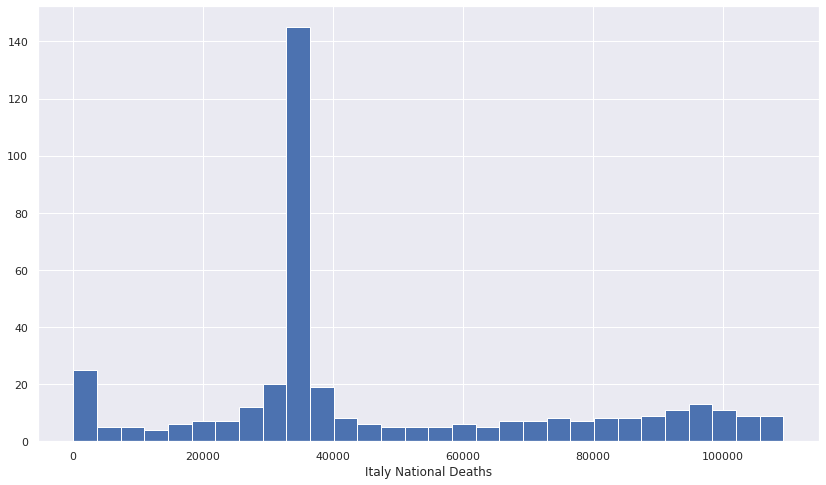

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
#To plot the graph embedded in the notebook
%matplotlib inline

sns.set(rc={'figure.figsize':(14,8)})
plt.hist(df_national['deaths'], bins=30)
plt.xlabel("Italy National Deaths")
plt.show()

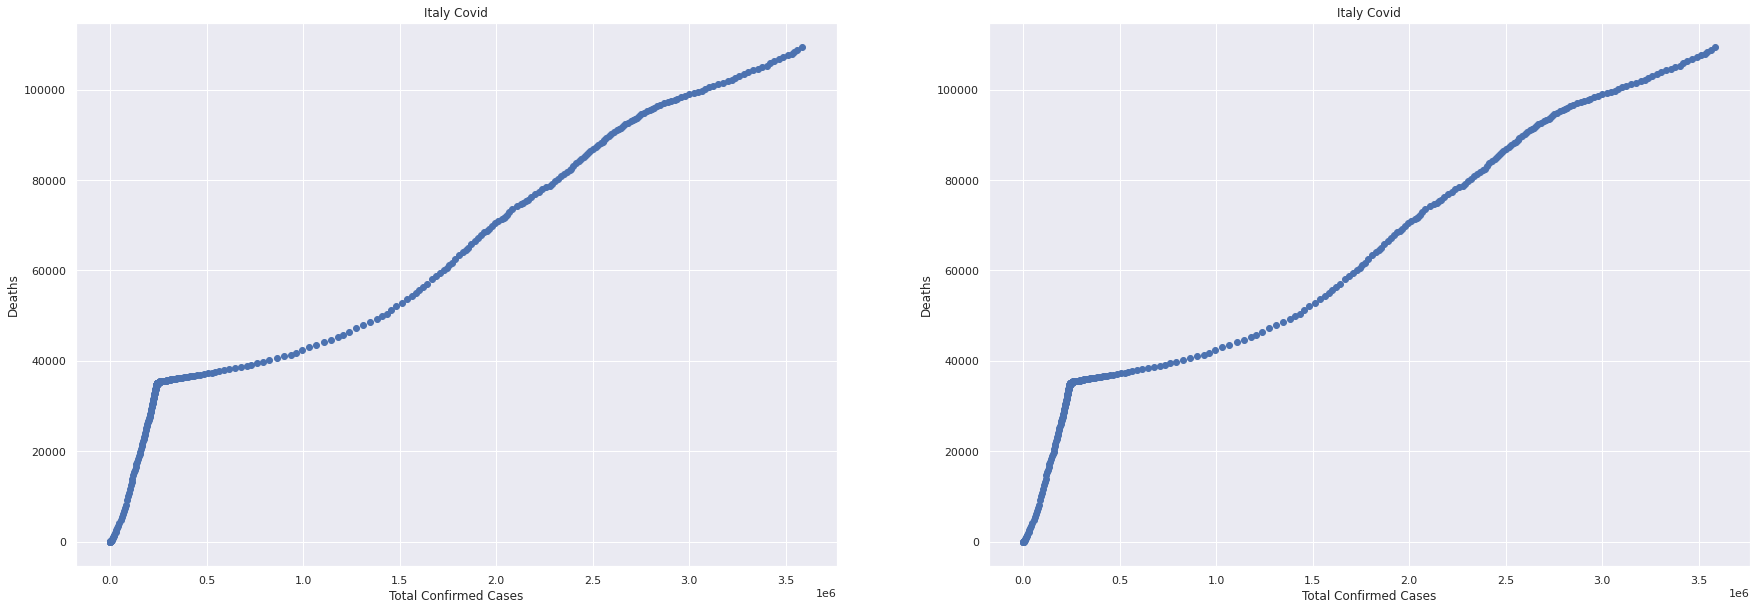

In [158]:
plt.figure(figsize=(30, 10))
df_national = dfquery.to_dataframe()

features = ['total_hospitalized_patients', 'hospitalized_patients_symptoms']
target = df_national['deaths']

df_national = dfquery.to_dataframe()

for i, df_national in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    df_national = dfquery.to_dataframe()
    x = df_national['total_confirmed_cases']
    y = df_national['deaths']
    plt.scatter(x, y, marker='o')
    plt.title("Italy Covid")

    plt.xlabel('Total Confirmed Cases')
    plt.ylabel('Deaths')

In [160]:
X_totalcases = df_national.new_total_confirmed_cases
y_deaths = df_national.deaths


X_totalcases = np.array(X_totalcases).reshape(-1,1)
y_deaths = np.array(y_deaths).reshape(-1,1)

print(X_totalcases.shape)
print(y_deaths.shape)

(402, 1)
(402, 1)


In [161]:
from sklearn.model_selection import train_test_split, cross_val_score

#Splitting the data into training and testing sets
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_totalcases, y_deaths, test_size = 0.2, random_state=5)

print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

(321, 1)
(81, 1)
(321, 1)
(81, 1)


In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg_1 = LinearRegression()
reg_1.fit(X_train_1, Y_train_1)

y_train_predict_1 = reg_1.predict(X_train_1)
rmse = (np.sqrt(mean_squared_error(Y_train_1, y_train_predict_1)))
r2 = round(reg_1.score(X_train_1, Y_train_1),2)

print("The model performance for training set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set:
RMSE is 23859.297587108776
R2 score is 0.31


In [163]:
# model evaluation for test set

y_pred_1 = reg_1.predict(X_test_1)
rmse = (np.sqrt(mean_squared_error(Y_test_1, y_pred_1)))
r2 = round(reg_1.score(X_test_1, Y_test_1),2)

print("The model performance for training set:")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))

The model performance for training set:
Root Mean Squared Error: 22973.790888420113
R^2: 0.32


(50, 1)


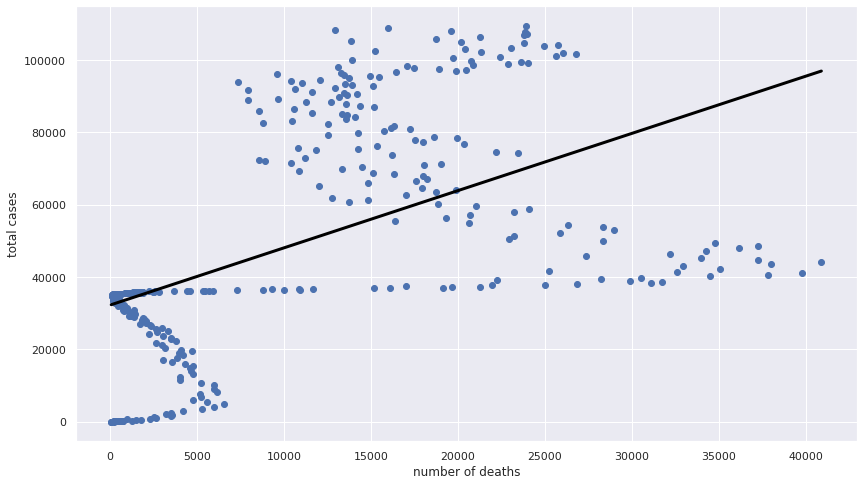

In [164]:
#Plotting the model fitted line on the output variable
prediction_space = np.linspace(min(X_totalcases), max(X_totalcases)).reshape(-1,1) 
print(prediction_space.shape)
plt.scatter(X_totalcases,y_deaths)
plt.plot(prediction_space, reg_1.predict(prediction_space), color = 'black', linewidth = 3)
plt.ylabel('total cases')
plt.xlabel('number of deaths')
plt.show()